<a href="https://colab.research.google.com/github/cromi0256/Study01/blob/main/4%EC%9E%A5_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4장 EDA

In [1]:
from matplotlib import pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf|

#plt.rcParams['font.family'] = 'NanumGothic' #글꼴설치
plt.rcParams['font.size']=12  #글자크기
plt.rcParams['figure.figsize'] = 8,8  #그래프 크기
plt.rcParams['axes.unicode_minus'] = False  #마이너스 부호 설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,269 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and dire

In [2]:
#4-1 선 그래프
import seaborn as sns
flights=sns.load_dataset('flights') #데이터셋 로드
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
import pandas as pd
import numpy as np

df=flights.drop('month',axis=1)
f2=df.groupby(by='year').mean()
print(f2)

      passengers
year            
1949  126.666667
1950  139.666667
1951  170.166667
1952  197.000000
1953  225.000000
1954  238.916667
1955  284.000000
1956  328.250000
1957  368.416667
1958  381.000000
1959  428.333333
1960  476.166667


<Axes: xlabel='year'>

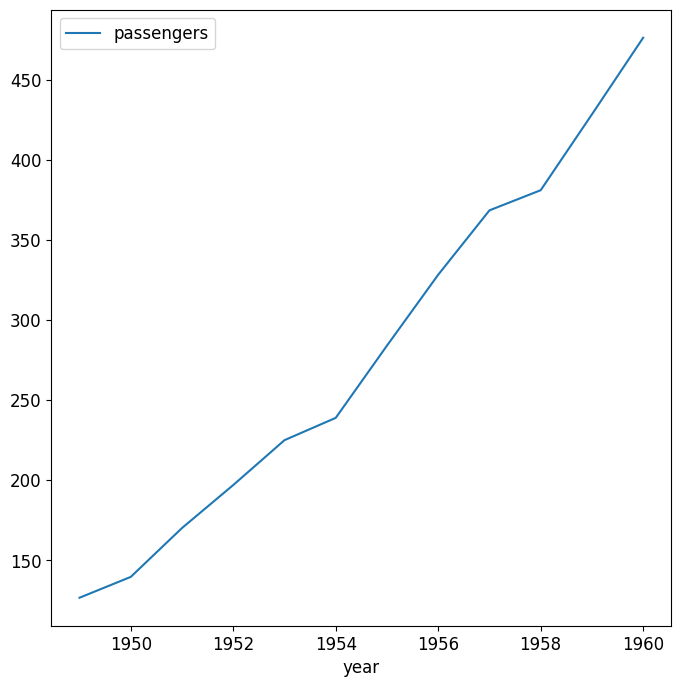

In [4]:
f2.plot() #데이터프레임으로 생성

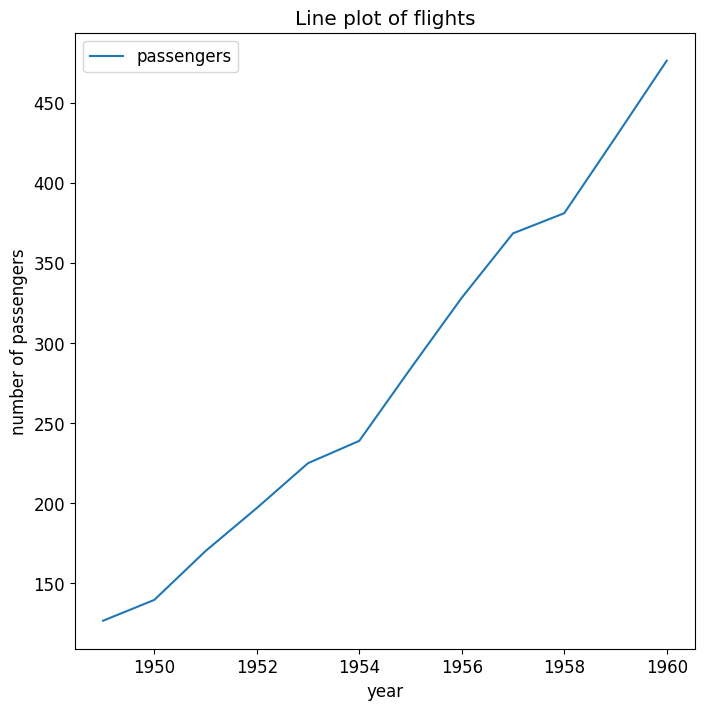

In [5]:
x=f2.index
y=f2.values.ravel() #2차원>1차원

plt.plot(x,y)
plt.xlabel('year')  #X축 라벨
plt.ylabel('number of passengers')  #Y축 라벨
plt.legend(['passengers'])  #범례설정
plt.title('Line plot of flights') #제목 입력
plt.show()

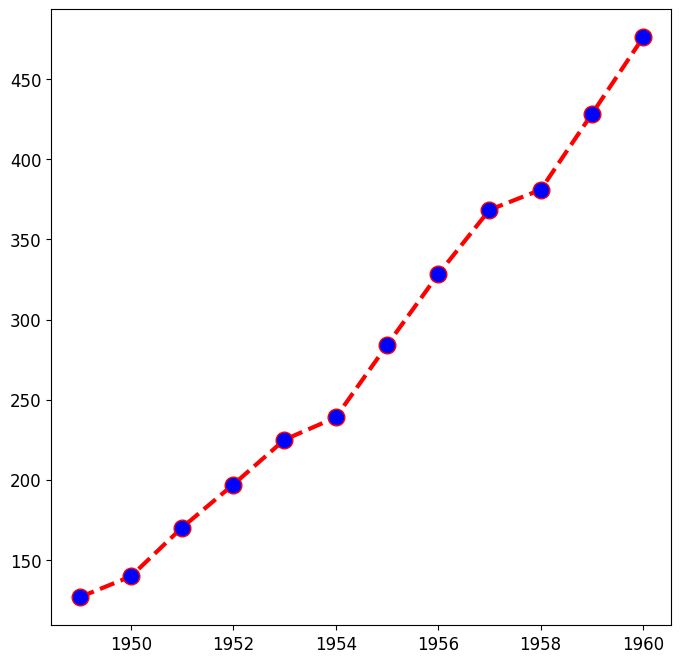

In [6]:
plt.plot(x,y,color='red',linestyle='--',linewidth=3, marker='o', markerfacecolor='blue', markersize=12)
#꾸미기
plt.show()

In [7]:
f3=df.groupby(by='year').agg(['mean','median','min'])
print(f3)

      passengers            
            mean median  min
year                        
1949  126.666667  125.0  104
1950  139.666667  137.5  114
1951  170.166667  169.0  145
1952  197.000000  192.0  171
1953  225.000000  232.0  180
1954  238.916667  231.5  188
1955  284.000000  272.0  233
1956  328.250000  315.0  271
1957  368.416667  351.5  301
1958  381.000000  360.5  310
1959  428.333333  406.5  342
1960  476.166667  461.0  390


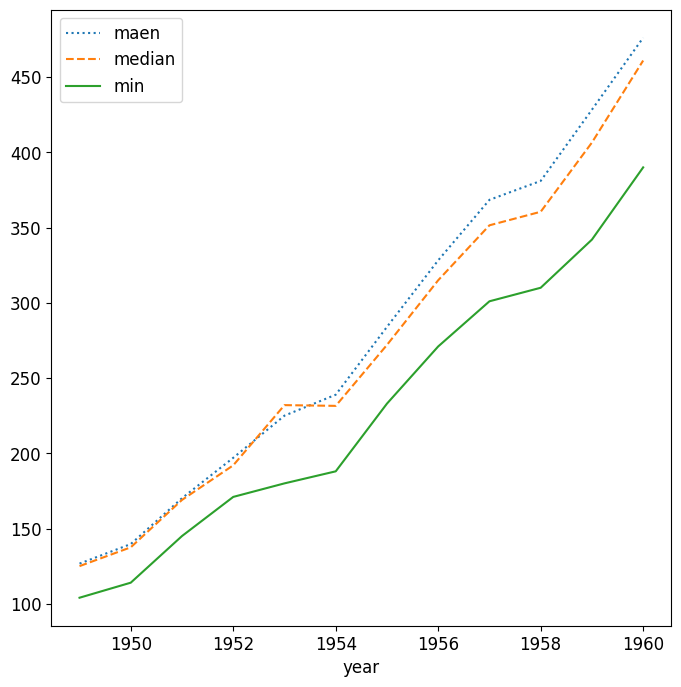

In [8]:
f3.plot(style=[':','--','-']) #간단한 스타일 지정
plt.legend(['maen','median','min'])
plt.show()

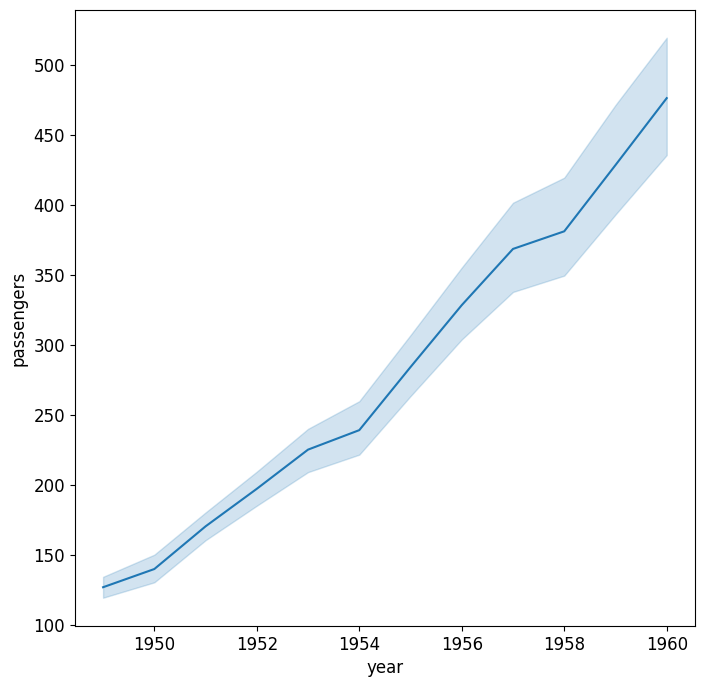

In [9]:
#seaborn으로 그리기
sns.lineplot(data=df,x='year',y='passengers')
plt.show()

In [10]:
#누적 연속 그래프 stackplot
healthexp=sns.load_dataset('healthexp').query('Year>=1992') #데이터로드
healthexp.reset_index(inplace=True) #인덱스 리셋
print(healthexp)

     index  Year        Country  Spending_USD  Life_Expectancy
0      100  1992         Canada      1897.456             77.8
1      101  1992        Germany      2019.308             76.1
2      102  1992         France      1651.139             77.5
3      103  1992  Great Britain       930.701             76.3
4      104  1992          Japan      1253.415             79.2
..     ...   ...            ...           ...              ...
169    269  2020        Germany      6938.983             81.1
170    270  2020         France      5468.418             82.3
171    271  2020  Great Britain      5018.700             80.4
172    272  2020          Japan      4665.641             84.7
173    273  2020            USA     11859.179             77.0

[174 rows x 5 columns]


In [11]:
Country=healthexp.Country.unique()
print(Country)
Spendings=[]
for country in Country:
  spending = healthexp[healthexp['Country']==country]['Spending_USD']
  Spendings.append(spending)
  print(country,len(spending))

['Canada' 'Germany' 'France' 'Great Britain' 'Japan' 'USA']
Canada 29
Germany 29
France 29
Great Britain 29
Japan 29
USA 29


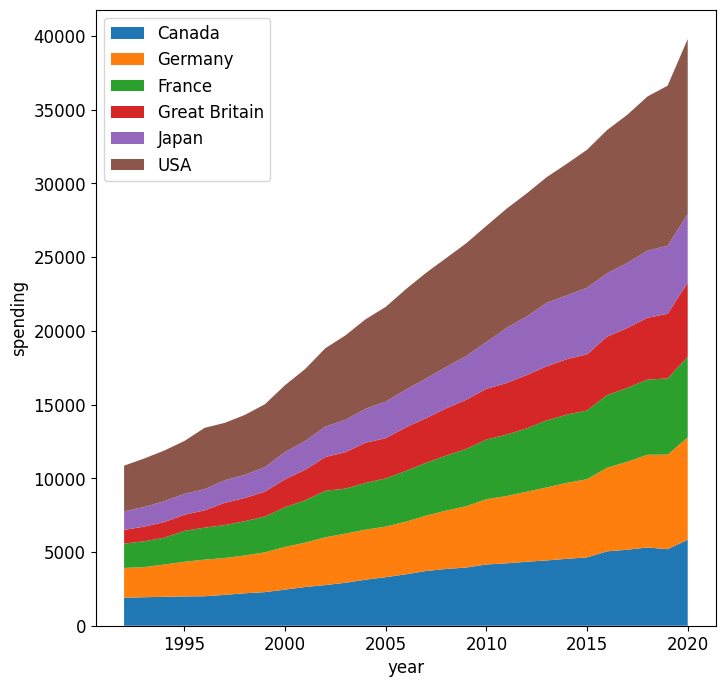

In [12]:
Year=healthexp.Year.unique()

plt.stackplot(Year,Spendings,labels=Country)
plt.legend(loc='upper left')
plt.xlabel('year')
plt.ylabel('spending')
plt.show()

In [13]:
#4-3막대그래프
mpg=sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


origin
usa       249
japan      79
europe     70
Name: count, dtype: int64


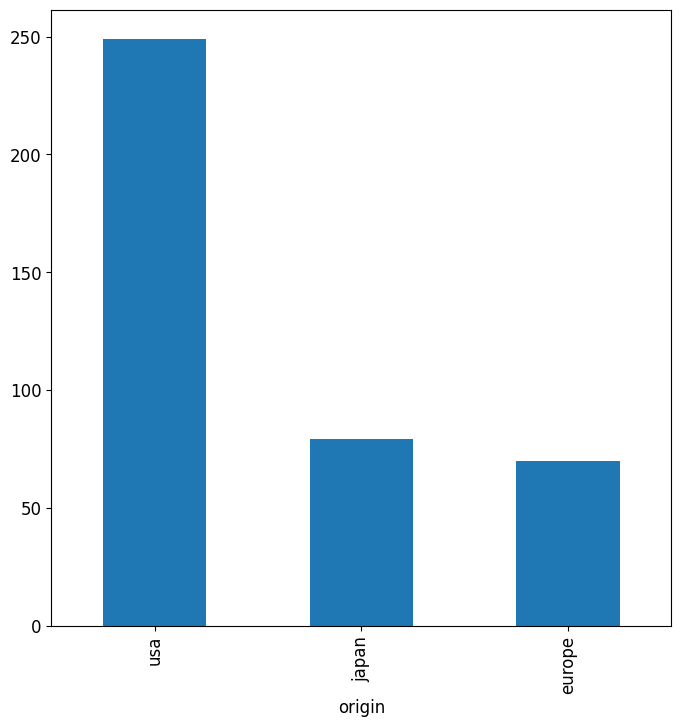

In [14]:
m2=mpg.origin.value_counts()
print(m2)

m2.plot(kind='bar')
plt.show()

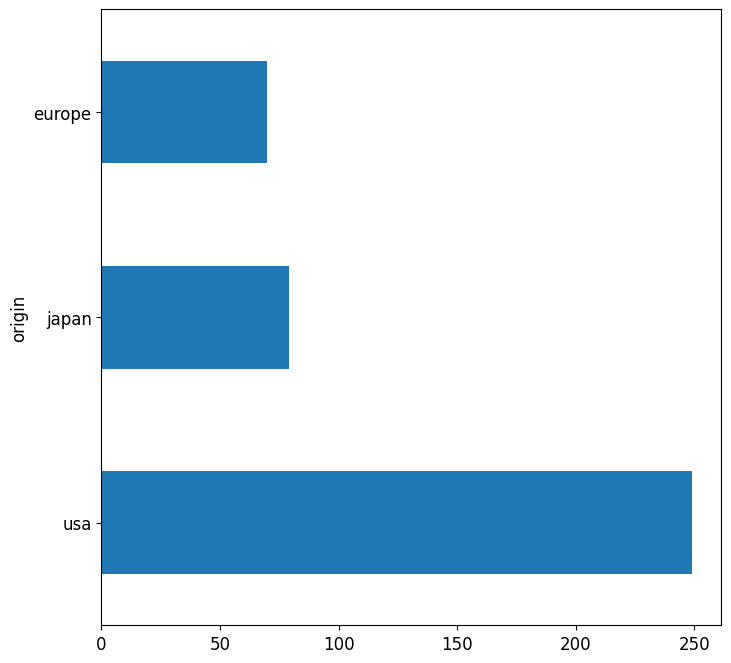

In [15]:
m2.plot(kind='barh')
plt.show()

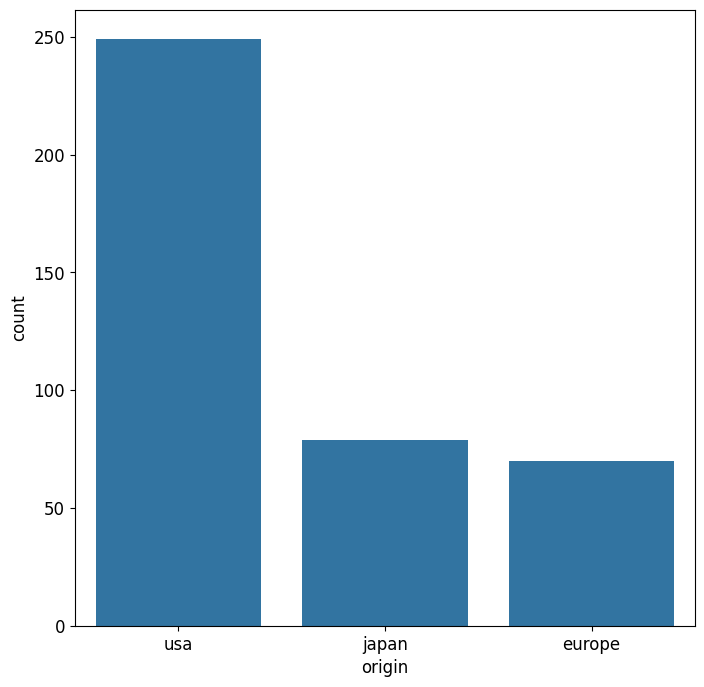

In [16]:
sns.countplot(x='origin',data=mpg)  #seaborn
plt.show()

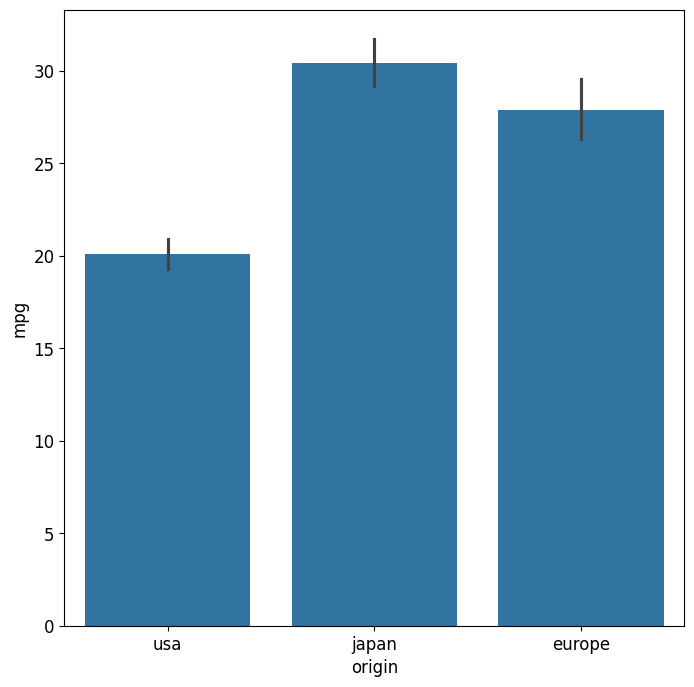

In [17]:
sns.barplot(x='origin',y='mpg',data=mpg)
plt.show()

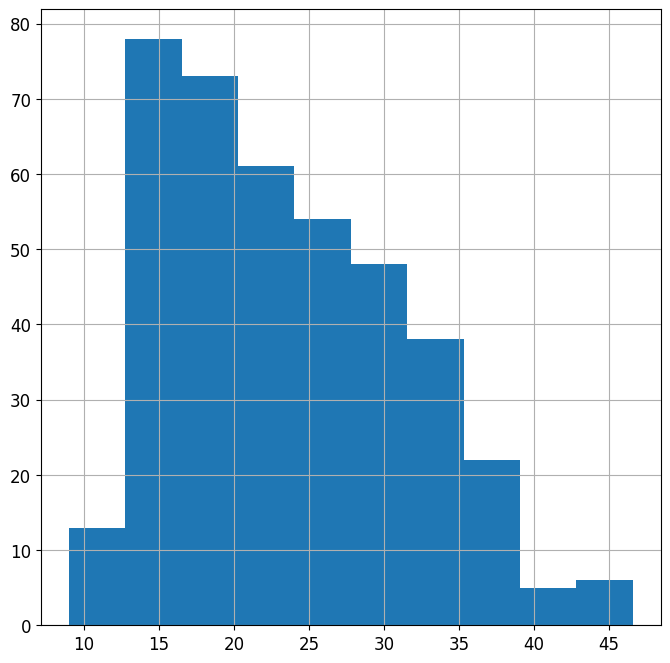

In [18]:
#4-4 히스토그램
mpg.mpg.hist()
plt.show()

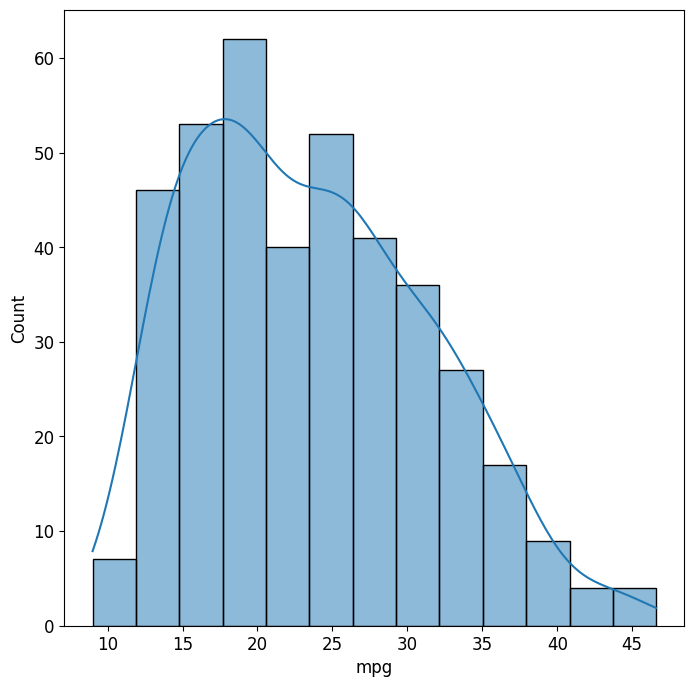

In [19]:
sns.histplot(mpg.mpg,kde=True)
plt.show()

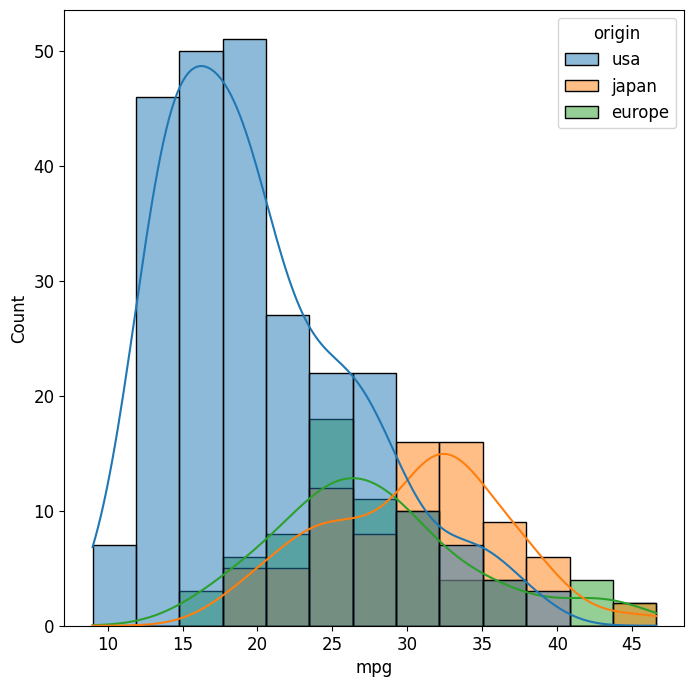

In [20]:
sns.histplot(x='mpg',data=mpg,hue='origin',kde=True)  #origin별로 히스토그램 표시
plt.show()

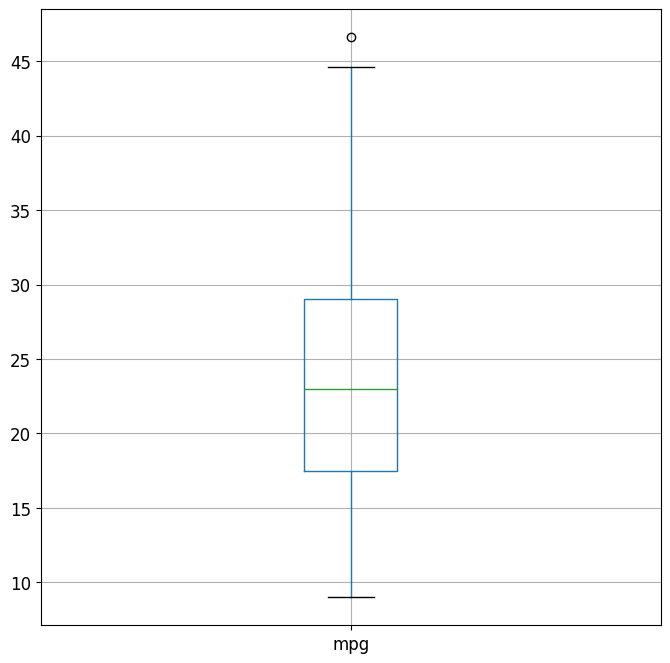

In [21]:
#4-5 박스플롯, 바이올린 플롯
mpg[['mpg']].boxplot()
plt.show()

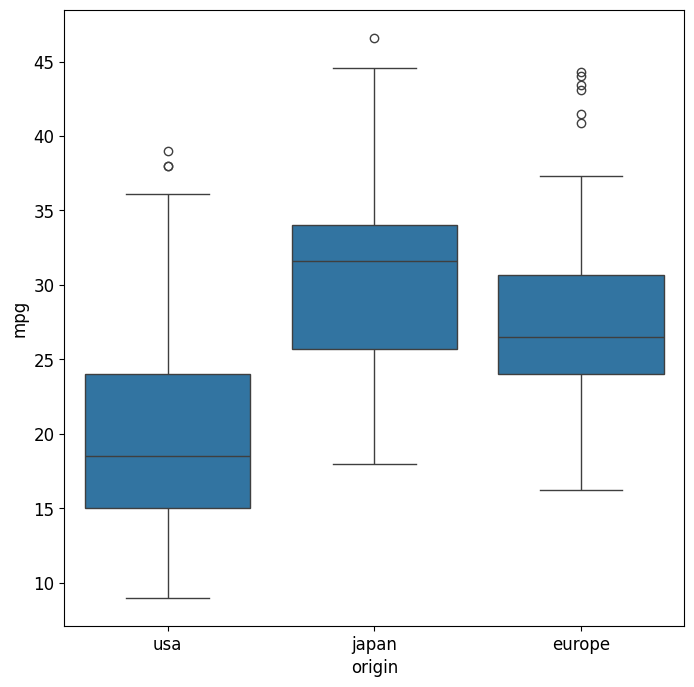

In [22]:
sns.boxplot(x='origin',y='mpg',data=mpg)
plt.show()

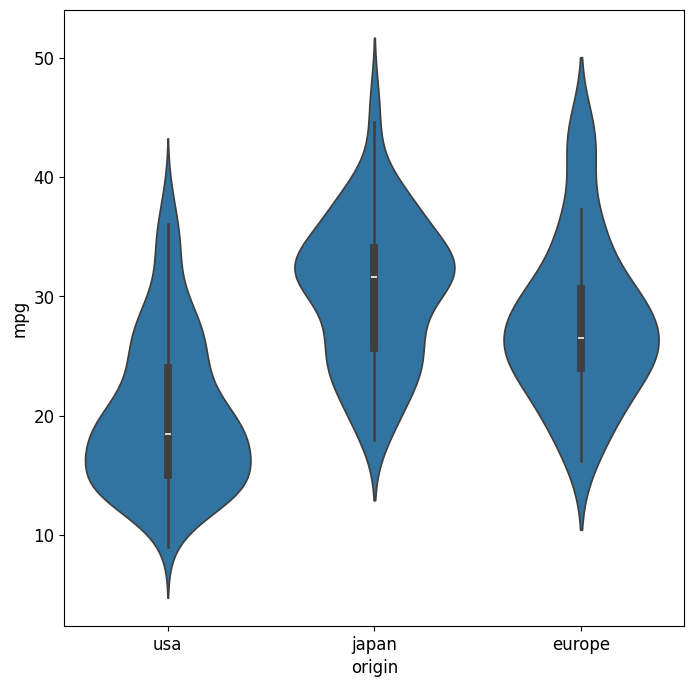

In [23]:
sns.violinplot(x='origin',y='mpg',data=mpg)
plt.show()

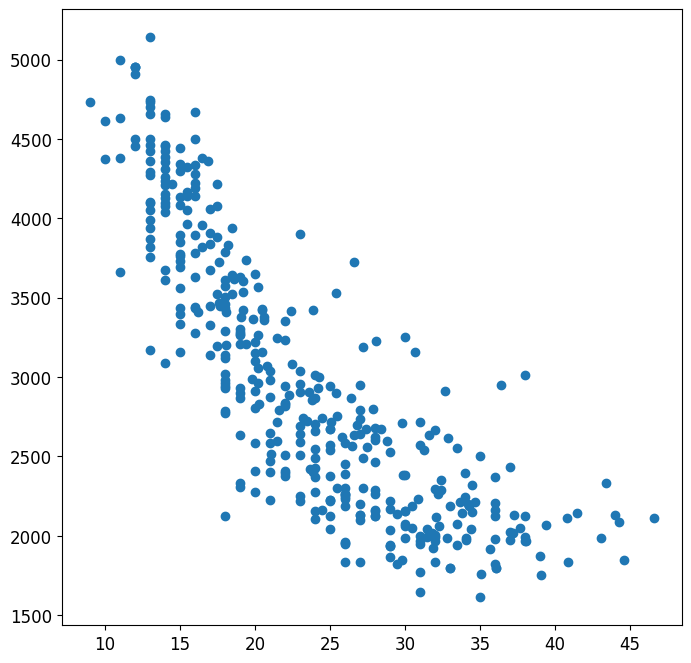

In [24]:
#4-6 산점도&페어플롯
plt.scatter(mpg.mpg,mpg.weight)
plt.show()

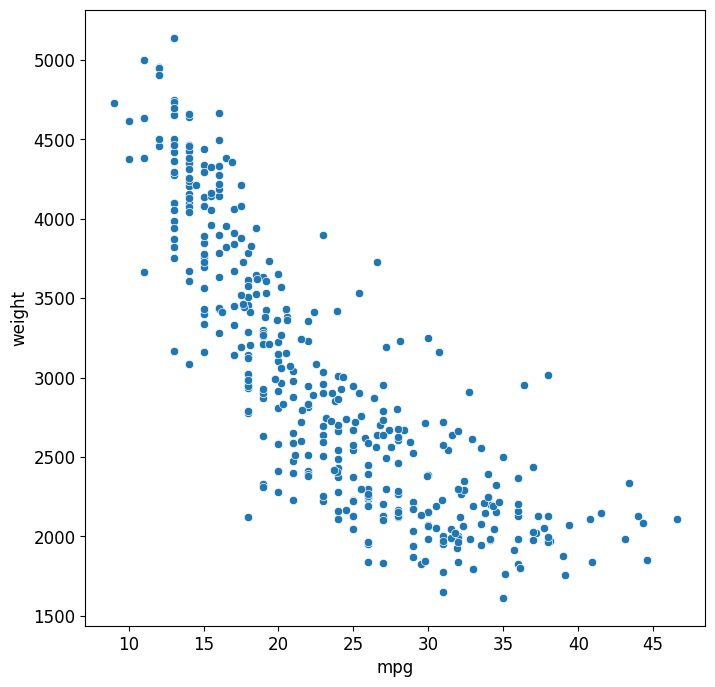

In [25]:
sns.scatterplot(x='mpg',y='weight',data=mpg)
plt.show()

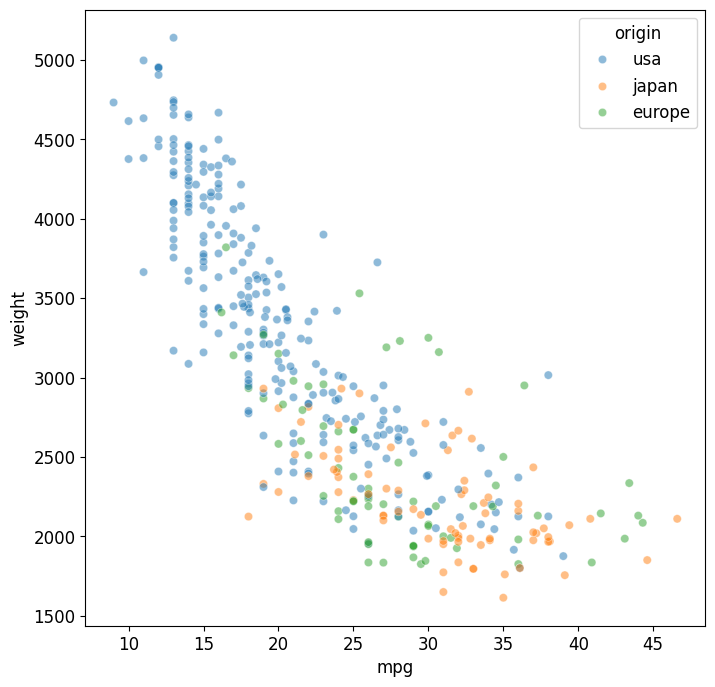

In [26]:
sns.scatterplot(x='mpg',y='weight',data=mpg,hue='origin',alpha=0.5)
plt.show()

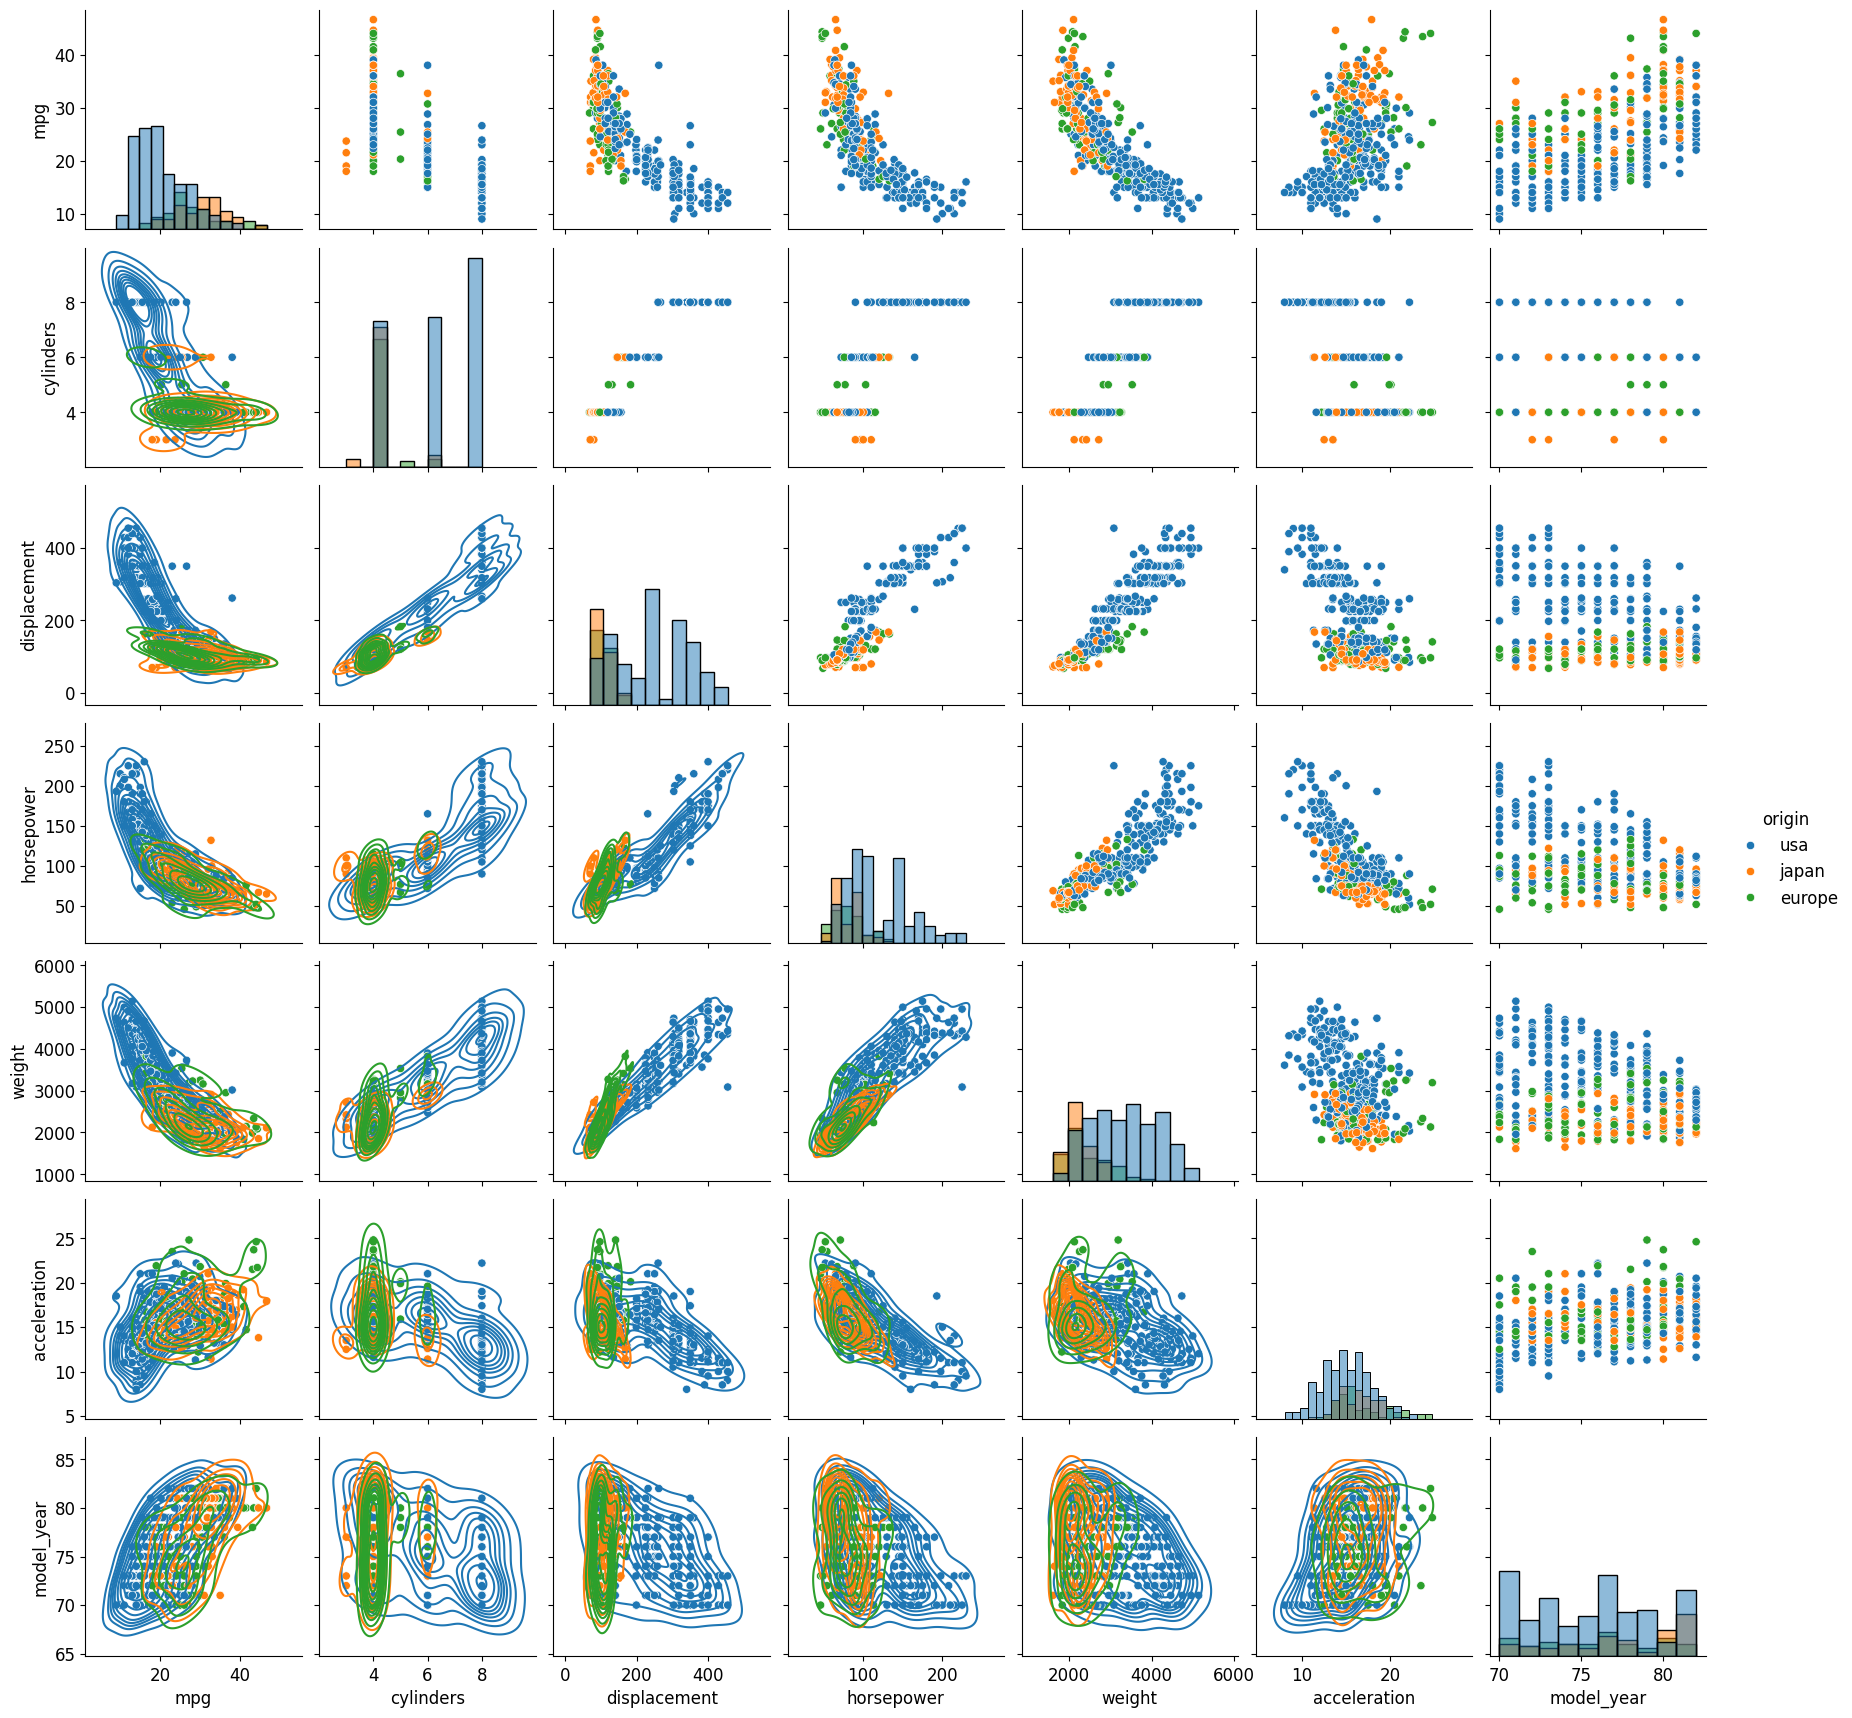

In [27]:
pairp=sns.pairplot(data=mpg,diag_kind='hist',hue='origin')
pairp.map_lower(sns.kdeplot)
plt.show()

In [28]:
#4-7 히트맵
taxis=sns.load_dataset('taxis')[['passengers','distance','fare','tip','tolls']]
print(taxis)

      passengers  distance  fare   tip  tolls
0              1      1.60   7.0  2.15    0.0
1              1      0.79   5.0  0.00    0.0
2              1      1.37   7.5  2.36    0.0
3              1      7.70  27.0  6.15    0.0
4              3      2.16   9.0  1.10    0.0
...          ...       ...   ...   ...    ...
6428           1      0.75   4.5  1.06    0.0
6429           1     18.74  58.0  0.00    0.0
6430           1      4.14  16.0  0.00    0.0
6431           1      1.12   6.0  0.00    0.0
6432           1      3.85  15.0  3.36    0.0

[6433 rows x 5 columns]


In [29]:
print(taxis.corr(method='pearson')) #상관행렬

            passengers  distance      fare       tip     tolls
passengers    1.000000  0.009411  0.007637  0.021099 -0.002903
distance      0.009411  1.000000  0.920108  0.452589  0.635267
fare          0.007637  0.920108  1.000000  0.488612  0.609307
tip           0.021099  0.452589  0.488612  1.000000  0.413619
tolls        -0.002903  0.635267  0.609307  0.413619  1.000000


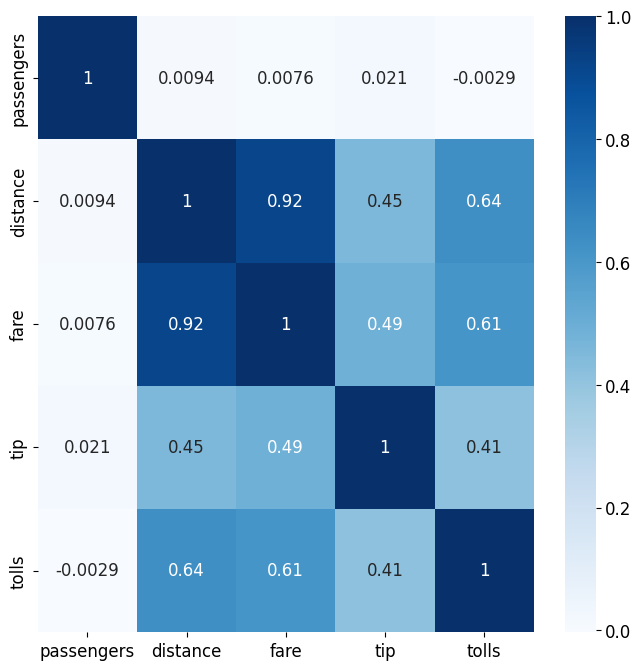

In [30]:
sns.heatmap(taxis.corr(),annot=True,cmap='Blues')
plt.show()

In [31]:
#4-8 서브플롯
dia=sns.load_dataset('diamonds')
print(dia)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


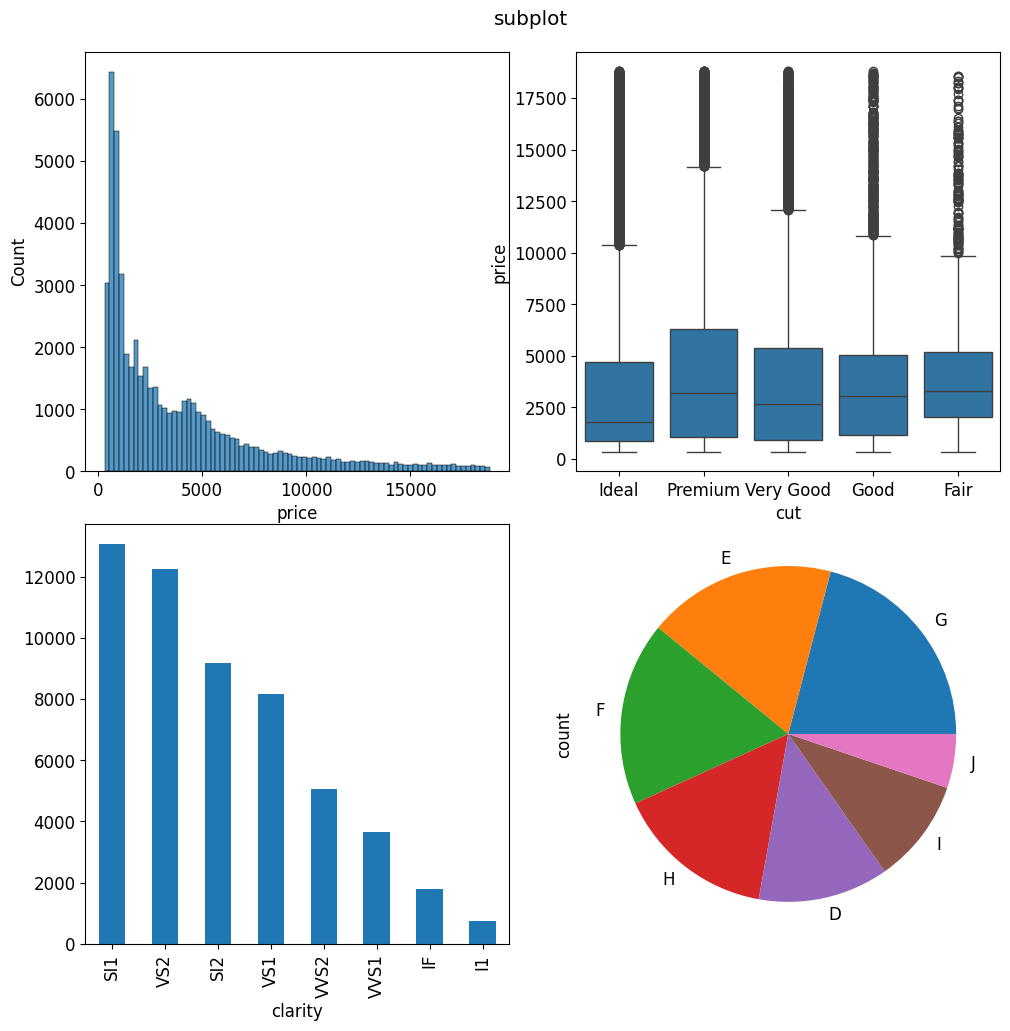

In [35]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10))  #2행 2열 그래프
fig.suptitle('subplot')
fig.tight_layout()
sns.histplot(dia.price,ax=axes[0,0])
sns.boxplot(x='cut',y='price',data=dia,ax=axes[0,1])

ax3=axes[1,0]
freq1=dia['clarity'].value_counts()
freq1.plot(kind='bar',ax=ax3)
ax4=axes[1,1]
freq2=dia['color'].value_counts()
freq2.plot(kind='pie',ax=ax4)
plt.show()


In [56]:
#4-9 트윈플롯
healthexp=sns.load_dataset('healthexp')
print(healthexp)

     Year        Country  Spending_USD  Life_Expectancy
0    1970        Germany       252.311             70.6
1    1970         France       192.143             72.2
2    1970  Great Britain       123.993             71.9
3    1970          Japan       150.437             72.0
4    1970            USA       326.961             70.9
..    ...            ...           ...              ...
269  2020        Germany      6938.983             81.1
270  2020         France      5468.418             82.3
271  2020  Great Britain      5018.700             80.4
272  2020          Japan      4665.641             84.7
273  2020            USA     11859.179             77.0

[274 rows x 4 columns]


In [73]:
germany=healthexp[healthexp['Country']=='Germany'].reset_index(drop=True) #데이터 추출후 인덷스 초기화
print(germany.head())

   Year  Country  Spending_USD  Life_Expectancy
0  1970  Germany       252.311             70.6
1  1971  Germany       298.251             70.8
2  1972  Germany       337.364             71.0
3  1973  Germany       384.541             71.3
4  1974  Germany       452.744             71.5


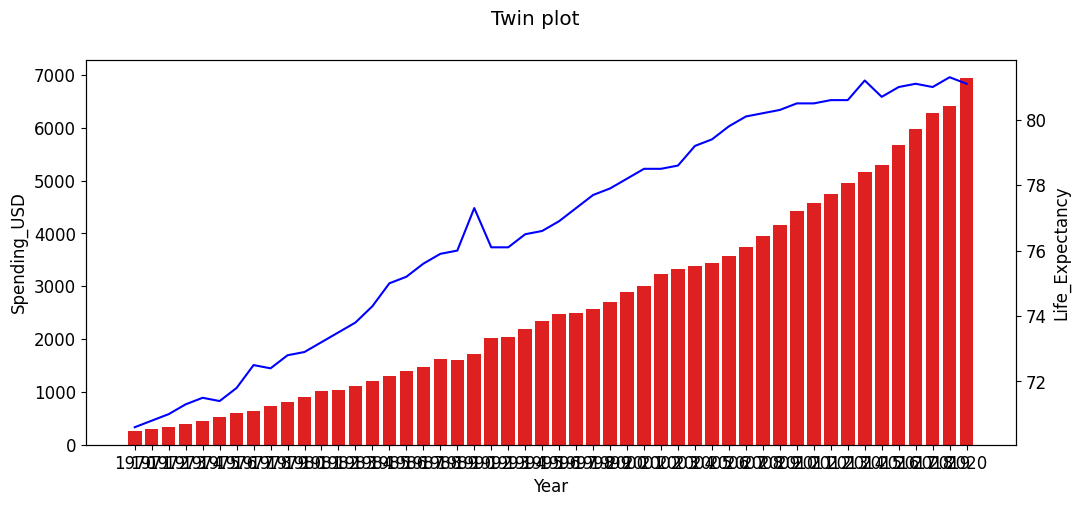

In [81]:

fig,ax1=plt.subplots(1,1,figsize=(12,5)) #하나의 서브플롯 생성
ax2=ax1.twinx() #트윈축 생성
plt.suptitle('Twin plot')

#data2=germany[['Year','Spending_USD']].set_index('Year')
sns.barplot(x='Year',y='Spending_USD',data=germany,color='red',ax=ax1)
sns.lineplot(data=germany['Life_Expectancy'],color='blue',ax=ax2)
plt.show()